In [5]:
from mr_eval.utils.utils import *
import os
from copy import deepcopy
import numpy as np
from matplotlib import font_manager

data_dir = "/mnt/petrelfs/songmingyang/code/reasoning/MR_Hallucination/mr_eval/tasks/prmtest_classified/data"
dataset_type = "dir_of_jsonl"

#domain_inconsistency	redundency	multi_solutions	deception	confidence	step_contradiction	circular	missing_condition	counterfactual
classification_name_dict = dict(
    domain_inconsistency="DC.",
    redundency="NR.",
    multi_solutions="MS.",
    deception="DR.",
    confidence="CI.",
    step_contradiction="SC.",
    circular="NCL.",
    missing_condition="PS.",
    counterfactual="ES."
)
classification_parallel_dict = dict(
    simplicity=dict(
        redundency="NR.",
        circular="NCL.",
    ),
    soundness=dict(
        counterfactual="ES.",
        step_contradiction="SC.",
        domain_inconsistency="DC.",
        confidence="CI.",
    ),
    sensitivity=dict(
        missing_condition="PS.",
        deception="DR.",
        multi_solutions="MS.",
    )
)
classifications = ["redundency", "circular", "counterfactual", "step_contradiction", "domain_inconsistency",  "confidence", "missing_condition", "deception", "multi_solutions", ]
data_files = os.listdir(data_dir)
data_files = [f for f in data_files if f.endswith(".jsonl")]
raw_data = []
for data_file in data_files:
    raw_data.extend(process_jsonl(os.path.join(data_dir, data_file)))
    


    

In [6]:
err_position_dict = dict(
    simplicity={},
    soundness={},
    sensitivity={},
    all={}
)
sum_dict = {}
for item in raw_data:
    classification = item["classification"]
    for k,v in classification_parallel_dict.items():
        if classification in v:
            classification = k
            break
    sum_dict[classification] = sum_dict.get(classification, 0) + 1
    sum_dict["all"] = sum_dict.get("all", 0) + 1
    for err_step in item["error_steps"]:
        if err_step not in err_position_dict[classification]:
            err_position_dict[classification][err_step] = 0
        err_position_dict[classification][err_step] += 1
        if err_step not in err_position_dict["all"]:
            err_position_dict["all"][err_step] = 0
        err_position_dict["all"][err_step] += 1

err_position_dist_dict = dict(
    simplicity=[],
    soundness=[],
    sensitivity=[],
    all=[]
)

for classification, position_dict in err_position_dict.items():
    for i in range(1,100):
        if i not in position_dict:
            position_dict[i] = 0
        err_position_dist_dict[classification].append(position_dict[i])


for k,v in err_position_dist_dict.items():
    err_position_dist_dict[k] = np.array(v) / sum_dict[k] * 100
err_position_dist_dict

{'simplicity': array([ 1.25329815, 14.84168865, 22.75725594, 30.34300792, 30.80474934,
        24.86807388, 20.11873351, 18.66754617, 15.4353562 , 10.55408971,
         8.24538259,  7.58575198,  5.67282322,  4.15567282,  2.30870712,
         2.77044855,  1.58311346,  1.78100264,  1.58311346,  1.12137203,
         1.45118734,  1.38522427,  1.31926121,  1.12137203,  0.92348285,
         1.05540897,  0.65963061,  0.92348285,  0.72559367,  0.65963061,
         0.72559367,  0.52770449,  0.59366755,  0.39577836,  0.46174142,
         0.39577836,  0.26385224,  0.92348285,  0.39577836,  0.39577836,
         0.3298153 ,  0.13192612,  0.13192612,  0.19788918,  0.26385224,
         0.19788918,  0.26385224,  0.13192612,  0.13192612,  0.06596306,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.06596306,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.

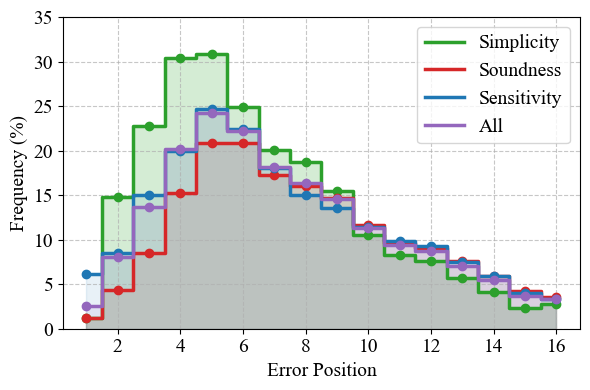

In [8]:
import numpy as np
import matplotlib.pyplot as plt

colors = [
    # "#335b88",
    # "#e05e4e",
    # "#6bb2cc",
    # "#fbcd6f",
    
    
    
    "#2ca02c",  # 绿色
    "#d62728",  # 红色
    
    "#1f77b4",  # 蓝色
    "#9467bd",  # 紫色
    "#eb8347",  # 橙色
    "#9467bd",  # 紫色
    "#8c564b",  # 棕色
    "#e377c2",  # 粉色
    "#7f7f7f",  # 灰色
    "#bcbd22",  # 橄榄色
    "#17becf"   # 青色
]
data_length = 17
# 示例数据
x = np.arange(1,data_length)
# 随机生成4组数据作为示例
data1 = err_position_dist_dict["simplicity"][:data_length-1]
data2 = err_position_dist_dict["soundness"][:data_length-1]
data3 = err_position_dist_dict["sensitivity"][:data_length-1]
data4 = err_position_dist_dict["all"][:data_length-1]
# data4 = np.random.exponential(0.3, 17)
font_path = '/mnt/petrelfs/songmingyang/code/tools/tool_code/result_dealing/draw_fig/Comic Sans MS.ttf'  
font_path = "/mnt/petrelfs/songmingyang/.config/fonts/Times New Roman.ttf"
custom_font = font_manager.FontProperties(fname=font_path,size=14)
# 创建图形
plt.figure(figsize=(6,4))

# 绘制阶梯线图和散点图
plt.step(x, data1, where='mid', label='Simplicity', linewidth=2.5, color = colors[0])
plt.plot(x, data1, 'o', alpha=1,color = colors[0])
plt.fill_between(x, data1, step='mid', alpha=0.2, color = colors[0])  # 添加阴影

plt.step(x, data2, where='mid', label='Soundness', linewidth=2.5, color = colors[1])
plt.plot(x, data2, 'o', alpha=1,color = colors[1])
plt.fill_between(x, data2, step='mid', alpha=0.1, color = colors[1]) 

plt.step(x, data3, where='mid', label='Sensitivity', linewidth=2.5, color = colors[2])
plt.plot(x, data3, 'o', alpha=1, color = colors[2])
plt.fill_between(x, data3, step='mid', alpha=0.1, color = colors[2])

plt.step(x, data4, where='mid', label='All', linewidth=2.5, color = colors[3])
plt.plot(x, data4, 'o', alpha=1, color = colors[3])
plt.fill_between(x, data4, step='mid', alpha=0.1, color = colors[3])

# 设置图形样式
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Error Position', fontproperties=custom_font)
plt.ylabel('Frequency (%)',fontproperties=custom_font)
plt.legend(prop=custom_font)
plt.xticks(fontproperties=custom_font)
plt.yticks(fontproperties=custom_font)

# 设置坐标轴范围
plt.ylim(0, 35)

plt.tight_layout()
plt.savefig("./res/error_position_distribution.pdf",format='pdf',bbox_inches='tight')
plt.show()

In [3]:
cnt = 0
for item in raw_data:
    num_of_steps = len(item["modified_process"])
    cnt += num_of_steps
print(cnt)

83456
